In [237]:
import pandas as pd
import numpy as np
#from sklearn.cross_validation import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier     #KNN
from sklearn.linear_model import LogisticRegression    #Logistic Regression
from sklearn.tree import DecisionTreeClassifier        #Decision Tree
from sklearn.ensemble import RandomForestClassifier    #Random Forest
from sklearn.neural_network import MLPClassifier       #Neural Network
from sklearn.svm import SVC                            #SVM
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import tree
import matplotlib.pylab as plt
import numpy as np
#import graphviz
import itertools

%matplotlib inline

# Objective
We'll train, test and validate a neural network with our labeled credit data (which we add in features names for). The only thing we know about this data is that theres 999 rows and 27 columns (columns are labeled). We also assume that we can place as many neurons in the hidden layer as you like. 

# Introduction
Artificial neural networks are the software implementation of the neuronal structure of our brain. the brain has neurons which can change their output state depending on the strength of their electrical or chemical input. A neural network is a massive interconnected network of neurons. Here is a simple video explaining what a <a href="https://www.youtube.com/watch?v=6qS83wD29PY">neuron</a> is.

We learn by repeatedly activating certain neural connections over others, this reinforces those connections and makes them more likely to preduce a desired outcome given a specified input. This learning involves feedback. By having desired outcomes, the neural connections cause that specific outcome to be more likely. Our networks will attempt to simplify and mimic brain behavior. We can train these networks in a supervised or unsupervised manner. 

The most basic neural network is a perceptron<br>
<img src="perceptron.png" width="600" height="300"></img><br> This is An algorithm for supervised learning on binary classifiers. Recall, a supervised learning algorithm is the task of learning a function that maps inputs to ourputs based on past input/outpur pairs. A perceptron is a classification algorithm that makes predictions to be used on a linear predictor function combining a set of weights w/ a feature vector. It learns a binary classifier called a threshold function which maps its input (x - a vector) to an output value (f(x) - a single binary value).

# Neural Networks
Theres many different algorithms for machine learning however the 3 main ones we usually see: Artifical neural network, Convolutional Neural Network, and Recurrent Neural Network. <b>In this example we will be using an Artifical neural network</b>. 

# Artificial Neural Network(ANN)
This type of network can been seen as a group of multiple perceptrons(neurons) at each layer. We can also cateogrize this as a <a href="https://en.wikipedia.org/wiki/Feedforward_neural_network">feed forward network</a>.<br>
<img src="ann-diagram.png" width="450" height="300"><img/><br>
ANNs are able to learn just about any nonlinear function; people also call them Universal Function Approximators. They have the capacity to learn weights that map any input to the output. One of the key features about this algorithm is we implement an activation function which introduces nonlinear properties to the network. We consider that our output is the activation of a weighted sum on inputs<br>
<img src="perceptron-g.gif"></img>

In [238]:
# turn our data to a dataframe
credit_df = pd.read_csv( "german-credit-card.txt", delim_whitespace = True, header = None)

# add column names to our data
columns = ['checkin_acc', 'duration', 'credit_history', 'purpose', 'amount',
           'saving_acc', 'present_emp_since', 'inst_rate', 'personal_status',
           'other_debtors', 'residing_since', 'property', 'age',
           'inst_plans', 'housing', 'num_credits',
           'job', 'dependents', 'telephone', 'foreign_worker', 'status']
           
credit_df.columns = columns

# select our tatger name (i.e good credit, bad credit)
credit_df.target_names= ['Good', 'Bad']

# # look at our data frame
# credit_df

X_features = list( credit_df.columns )
X_features.remove( 'status' )

# create new DF with values
credit_df_complete = pd.get_dummies( credit_df[X_features], drop_first = True )

Y = credit_df.status - 1  # the staus we set corresponds to a 1 or 2
X = credit_df_complete   # pandas dataframe

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state = 42)

# multi-layer perceptron classifier
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print('acc for training data: {:.3f}'.format(mlp.score(X_train, y_train)))
print('acc for test data: {:.3f}'.format(mlp.score(X_test, y_test)))


/var/folders/rp/8y6kqydx4gz7_qbqgv893ccm0000gn/T/ipykernel_1055/172650798.py:14: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  credit_df.target_names= ['Good', 'Bad']


acc for training data: 0.583
acc for test data: 0.610


#### PLEASE ADD A FEW LINES CODE AS FOLLOWS TO IMPROVE THE MODEL, For example, you need to do data normalization, data standardization, and other data mining models.   IF YOU DO NOT HAVE CODE EXPERIENCE, PLEASE DISCUSS SEVERAL APPROACH TO MAKE IMPROVEMENT. 

# Normalize data then use MLPClassifier on the dataframe

In [239]:
# normalize our dataframe
# run this normalized df in MLPClassifier
# use min max scalar to normalize data

x = credit_df_complete.values
MinMax = preprocessing.MinMaxScaler()
norml = MinMax.fit_transform(x)
df_norm = pd.DataFrame(norml)
df_norm.columns = credit_df_complete.columns
X = df_norm    # pandas dataframe

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state = 42)

# multi-layer perceptron classifier
mlp = MLPClassifier(random_state=42, hidden_layer_sizes=120, max_iter=700)
mlp.fit(X_train, y_train)

print('acc for training data: {:.3f}'.format(mlp.score(X_train, y_train)))
print('acc for test data: {:.3f}'.format(mlp.score(X_test, y_test)))
df_norm

acc for training data: 1.000
acc for test data: 0.790


,duration,amount,inst_rate,residing_since,age,num_credits,dependents,checkin_acc_A12,checkin_acc_A13,checkin_acc_A14,...,property_A124,inst_plans_A142,inst_plans_A143,housing_A152,housing_A153,job_A172,job_A173,job_A174,telephone_A192,foreign_worker_A202
0,0.029412,0.050567,1.000000,1.000000,0.857143,0.333333,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.647059,0.313690,0.333333,0.333333,0.053571,0.000000,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.117647,0.101574,0.333333,0.666667,0.535714,0.000000,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.558824,0.419941,0.333333,1.000000,0.464286,0.000000,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.294118,0.254209,0.666667,1.000000,0.607143,0.333333,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.117647,0.081765,0.666667,1.000000,0.214286,0.000000,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
996,0.382353,0.198470,1.000000,1.000000,0.375000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
997,0.117647,0.030483,1.000000,1.000000,0.339286,0.000000,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
998,0.602941,0.087763,1.000000,1.000000,0.071429,0.000000,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


# Standardize data and use MLPClassifier

In [240]:
# standardize our data
# run this in our MLPClassifier
credit_df_complete = pd.get_dummies( credit_df[X_features], drop_first = True )
scaler = preprocessing.StandardScaler()  # from sklearn import preprocessing is used instead of importing StandardScalar()
scaler.fit(credit_df_complete)
df_std= pd.DataFrame(scaler.transform(credit_df_complete), columns=credit_df_complete.columns)

X = df_std    # pandas dataframe

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state = 42)

# print(credit_df_complete.shape)

# multi-layer perceptron classifier
mlp = MLPClassifier(random_state=42, hidden_layer_sizes=120, max_iter=700)
mlp.fit(X_train, y_train)

print('acc for training data: {:.3f}'.format(mlp.score(X_train, y_train)))
print('acc for test data: {:.3f}'.format(mlp.score(X_test, y_test)))
df_std

acc for training data: 1.000
acc for test data: 0.810


,duration,amount,inst_rate,residing_since,age,num_credits,dependents,checkin_acc_A12,checkin_acc_A13,checkin_acc_A14,...,property_A124,inst_plans_A142,inst_plans_A143,housing_A152,housing_A153,job_A172,job_A173,job_A174,telephone_A192,foreign_worker_A202
0,-1.236478,-0.745131,0.918477,1.046987,2.766456,1.027079,-0.428290,-0.606621,-0.259299,-0.806328,...,-0.426653,-0.222076,0.478018,0.634448,-0.347960,-0.5,0.766356,-0.416784,1.214598,-0.196014
1,2.248194,0.949817,-0.870183,-0.765977,-1.191404,-0.704926,-0.428290,1.648476,-0.259299,-0.806328,...,-0.426653,-0.222076,0.478018,0.634448,-0.347960,-0.5,0.766356,-0.416784,-0.823318,-0.196014
2,-0.738668,-0.416562,-0.870183,0.140505,1.183312,-0.704926,2.334869,-0.606621,-0.259299,1.240190,...,-0.426653,-0.222076,0.478018,0.634448,-0.347960,2.0,-1.304877,-0.416784,-0.823318,-0.196014
3,1.750384,1.634247,-0.870183,1.046987,0.831502,-0.704926,2.334869,-0.606621,-0.259299,-0.806328,...,-0.426653,-0.222076,0.478018,-1.576173,2.873893,-0.5,0.766356,-0.416784,-0.823318,-0.196014
4,0.256953,0.566664,0.024147,1.046987,1.535122,1.027079,2.334869,-0.606621,-0.259299,-0.806328,...,2.343823,-0.222076,0.478018,-1.576173,2.873893,-0.5,0.766356,-0.416784,-0.823318,-0.196014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.738668,-0.544162,0.024147,1.046987,-0.399832,-0.704926,-0.428290,-0.606621,-0.259299,1.240190,...,-0.426653,-0.222076,0.478018,0.634448,-0.347960,2.0,-1.304877,-0.416784,-0.823318,-0.196014
996,0.754763,0.207612,0.918477,1.046987,0.391740,-0.704926,-0.428290,-0.606621,-0.259299,-0.806328,...,-0.426653,-0.222076,0.478018,0.634448,-0.347960,-0.5,-1.304877,2.399324,1.214598,-0.196014
997,-0.738668,-0.874503,0.918477,1.046987,0.215835,-0.704926,-0.428290,-0.606621,-0.259299,1.240190,...,-0.426653,-0.222076,0.478018,0.634448,-0.347960,-0.5,0.766356,-0.416784,-0.823318,-0.196014
998,1.999289,-0.505528,0.918477,1.046987,-1.103451,-0.704926,-0.428290,-0.606621,-0.259299,-0.806328,...,2.343823,-0.222076,0.478018,-1.576173,2.873893,-0.5,0.766356,-0.416784,1.214598,-0.196014


# KNN & Setting up Confusion Matrix for KNN

([<matplotlib.patches.Wedge at 0x11f9ede50>,
 [Text(0.9715165231687864, 0.5159027478217508, 'Accuracy'),
  Text(-0.36086748310962385, 1.0391220619513983, 'Recall(sensitivity)'),
  Text(-0.9469476059719615, -0.5597233526877105, 'Precision'),
  Text(0.6982773088178625, -0.8499463512422909, 'FScore')])

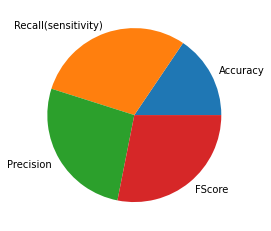

In [241]:
# implements the confusion matrix to return some metrics based on predictions and actual values based 
# on the KNNNeighborsClassifier method
def evaluateBinaryClassification(predictions, actuals):
    contigency = pd.crosstab(actuals,predictions)
    TP = contigency[0][1]
    TN = contigency[1][1]
    FP = contigency[0][1]
    FN = contigency[1][0]
    n = contigency.sum().sum()

    Acuracy = (TP + TN)/n   # the percentage of corrections we got right over all predictions
    Recall = TP/(TP+FN) # the percentage of positive that were predicted as positive (sensitivity)
    Precision = TP/(TP+FP) # what predictions came up positive out of all predictions
    FScore = 2*Recall*Precision/(Recall+Precision)  # the harmonic score of precision
    
    return Acuracy, Recall, Precision, FScore

    
select_features=df[df.importance>=0.03].feature

# knn
knn = KNeighborsClassifier(n_neighbors=3, weights='uniform').fit(X_train[select_features], y_train)
y_predict_knn = knn.predict(X_test[select_features])
pd.crosstab(y_test, y_predict_knn)
binaryClassificationMetrics = evaluateBinaryClassification(y_predict_knn, y_test)


# display binary classification metrics for KNN
pieLabels = ["Accuracy", "Recall(sensitivity)", "Precision", "FScore"]
plt.pie(binaryClassificationMetrics, labels = pieLabels)

# Logistic Regression

In [277]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_test)

from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,y_pred)
print('Accuracy :',score)


Accuracy : 0.8


# Random forest

In [286]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 42)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})

df


,Actual,Predicted
521,1,0.215
737,0,0.283
740,0,0.624
660,0,0.497
411,0,0.007
...,...,...
436,0,0.387
764,0,0.034
88,0,0.275
63,1,0.925


# Compute confusion matrix for credit_df

In [269]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    # plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



Confusion matrix, without normalization
[[62  9]
 [10 19]]
Normalized confusion matrix
[[0.87 0.13]
 [0.34 0.66]]


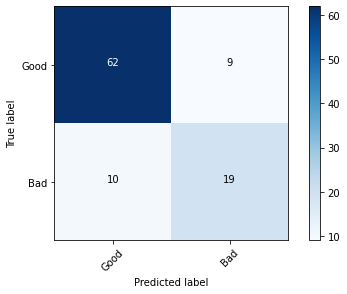

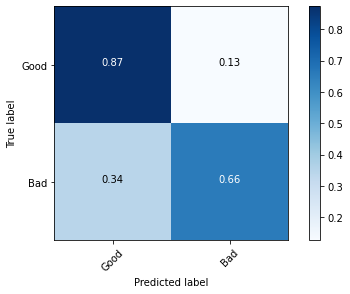

In [270]:
from sklearn.metrics import confusion_matrix

class_names=credit_df.target_names
y_pred= mlp.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True, title='Normalized confusion matrix')

plt.show()


# Summary 
### Results from regular df
acc for training data: 0.583
acc for test data: 0.610

### Results for normalized df
acc for training data: 1.000
acc for test data: 0.790

### Results for standardized df
acc for training data: 1.000
acc for test data: 0.810

### Logistic Regression results
Accuracy : 0.8

### Results of random forest regression
```c++

Actual	Predicted
521	1	0.215
737	0	0.283
740	0	0.624
660	0	0.497
411	0	0.007
...	...	...
436	0	0.387
764	0	0.034
88	0	0.275
63	1	0.925
826	1	0.292

```

# Conclusion
The most accurate model seems to be using MLPClassifier on standardized data.
